# Extraction de la dataset

In [140]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

In [141]:
targets = []
features = []
files = glob.glob("training/*/*.jpg")
random.shuffle(files)

In [142]:
files

['training\\cats\\cat.1035.jpg',
 'training\\cats\\cat.3317.jpg',
 'training\\cats\\cat.3309.jpg',
 'training\\cats\\cat.2378.jpg',
 'training\\dogs\\dog.1522.jpg',
 'training\\dogs\\dog.442.jpg',
 'training\\cats\\cat.3889.jpg',
 'training\\cats\\cat.3592.jpg',
 'training\\cats\\cat.916.jpg',
 'training\\dogs\\dog.1243.jpg',
 'training\\cats\\cat.1523.jpg',
 'training\\dogs\\dog.2714.jpg',
 'training\\cats\\cat.1953.jpg',
 'training\\dogs\\dog.575.jpg',
 'training\\cats\\cat.3088.jpg',
 'training\\cats\\cat.2357.jpg',
 'training\\dogs\\dog.3485.jpg',
 'training\\dogs\\dog.3550.jpg',
 'training\\cats\\cat.755.jpg',
 'training\\cats\\cat.1658.jpg',
 'training\\dogs\\dog.3437.jpg',
 'training\\cats\\cat.503.jpg',
 'training\\dogs\\dog.1454.jpg',
 'training\\dogs\\dog.3747.jpg',
 'training\\dogs\\dog.3564.jpg',
 'training\\cats\\cat.1078.jpg',
 'training\\cats\\cat.398.jpg',
 'training\\cats\\cat.1157.jpg',
 'training\\cats\\cat.1922.jpg',
 'training\\dogs\\dog.2483.jpg',
 'training\\cats

In [143]:
for file in files:
    features.append(np.array(Image.open(file).resize((75,75))))
    target =[1, 0] if "cats" in file else [0, 1]
    targets.append(target)

features = np.array(features)
targets = np.array(targets)
print("Shape features", features.shape)
print("Shape targets", targets.shape)

Shape features (8005, 75, 75, 3)
Shape targets (8005, 2)


# Visualistaion des images

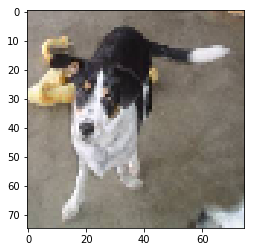

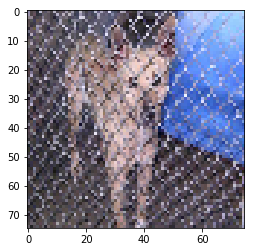

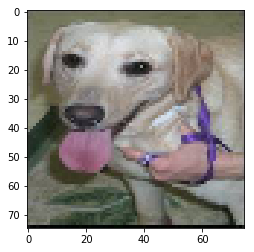

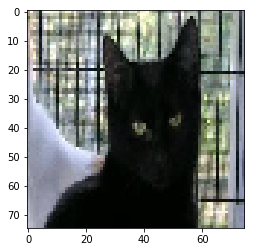

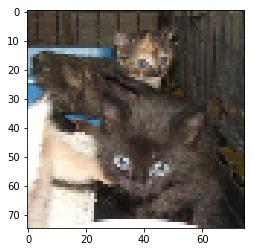

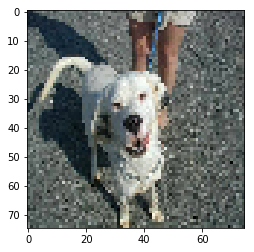

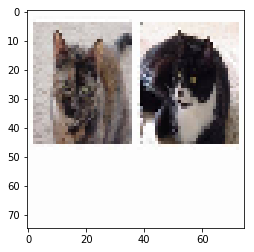

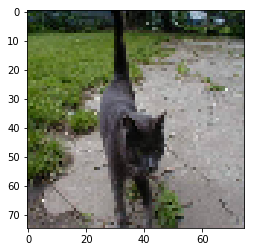

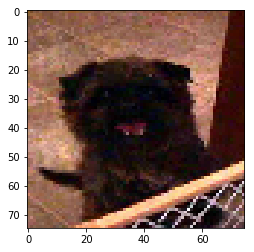

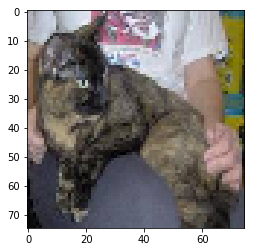

In [144]:
from random import randint
for a in [randint(0, len(targets)) for _ in range(10)]:
    plt.imshow(features[a])
    plt.show()

# Jeu d'entrainement/ jeu de validation

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(features,targets, test_size=0.1, random_state=42)
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("Y_train", Y_train.shape)
print("Y_valid", Y_valid.shape)

X_train (7204, 75, 75, 3)
X_valid (801, 75, 75, 3)
Y_train (7204, 2)
Y_valid (801, 2)


# Creation du modele

In [146]:
import tensorflow as tf
from tensorflow.contrib.layers import  flatten
# placsholder

x = tf.placeholder(tf.float32, (None, 75, 75,3), name="Image")
y = tf.placeholder(tf.float32, (None, 2), name="Targets")

def create_conv(prev, filter_size, nb):
    
    
    w_filters  =tf.Variable(tf.truncated_normal(shape=(filter_size,filter_size, int(prev.get_shape()[-1]), nb)))
    b_filters = tf.Variable(tf.zeros(shape=(nb)))
    conv = tf.nn.conv2d(prev, w_filters, strides=[1,1,1,1], padding="SAME") + b_filters
    
    conv = tf.nn.relu(conv)
    conv = tf.nn.max_pool(conv, ksize=[1, 2, 2, 1], strides=[1,2,2,1], padding="SAME")
    return conv

#Convolution

conv = create_conv(x, 8, 32)
conv = create_conv(conv, 5, 64)
conv = create_conv(conv, 5, 64)
conv = create_conv(conv, 5, 128)
conv = create_conv(conv,5, 256)

flat= flatten(conv)
#Fully connected layer
w1= tf.Variable(tf.truncated_normal(shape=(int(flat.get_shape()[1]), 521)))
b1 = tf.Variable(tf.zeros(shape=(521)))

fc1 = tf.matmul(flat, w1) + b1
fc1 = tf.nn.relu(fc1)

#Fully connected layer [Output]
w2 = tf.Variable(tf.truncated_normal(shape=(521, 2)))
b2 = tf.Variable(tf.zeros(shape=(2)))

logits = tf.matmul(fc1, w2) + b2

softmax = tf.nn.softmax(logits)


# Erreur et optimisation

In [147]:
#loss
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(softmax, axis=1), tf.argmax(y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Optimizer
optimizer = tf.train.AdamOptimizer(0.0001)
train_op = optimizer.minimize(loss_operation)

# Train the model

In [148]:
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
i=0
for epoch in range (0,  50):
    index = np.arange(len(X_train))
    np.random.shuffle(index)
    X_train = X_train[index]
    Y_trian = Y_train[index]
    for b in range(0, len(X_train), batch_size):
       
        batch = X_train[b:b+batch_size]
        batch_label = Y_train[b:b+batch_size]
        sess.run(train_op, feed_dict={x: batch, y: batch_label})
        if i % 50 ==0:
            print("accuracy[train]", sess.run(accuracy, feed_dict={x: batch, y:batch_label}))
        i+=1
    
    if epoch % 2==0 :
        accs =[]
        for b in range(0, len(X_valid), batch_size):
            batch_valid = X_valid[b:b+batch_size]
            batch_valid_label= Y_valid[b:b+batch_size]
            accs.append(sess.run(accuracy, feed_dict={x: batch_valid, y:batch_valid_label}))
        print("accuracy[validation]",np.mean(accs))
print("Done")

b=0 , 7204
b=100 , 7204
b=200 , 7204
b=300 , 7204
b=400 , 7204
b=500 , 7204
b=600 , 7204
b=700 , 7204
b=800 , 7204
b=900 , 7204
b=1000 , 7204
b=1100 , 7204
b=1200 , 7204
b=1300 , 7204
b=1400 , 7204
b=1500 , 7204
b=1600 , 7204
b=1700 , 7204
b=1800 , 7204
b=1900 , 7204
b=2000 , 7204
b=2100 , 7204
b=2200 , 7204
b=2300 , 7204
b=2400 , 7204
b=2500 , 7204
b=2600 , 7204
b=2700 , 7204
b=2800 , 7204
b=2900 , 7204
b=3000 , 7204
b=3100 , 7204
b=3200 , 7204
b=3300 , 7204
b=3400 , 7204
b=3500 , 7204
b=3600 , 7204
b=3700 , 7204
b=3800 , 7204
b=3900 , 7204
b=4000 , 7204
b=4100 , 7204
b=4200 , 7204
b=4300 , 7204
b=4400 , 7204
b=4500 , 7204
b=4600 , 7204
b=4700 , 7204
b=4800 , 7204
b=4900 , 7204
b=5000 , 7204
b=5100 , 7204
b=5200 , 7204
b=5300 , 7204
b=5400 , 7204
b=5500 , 7204
b=5600 , 7204
b=5700 , 7204
b=5800 , 7204
b=5900 , 7204
b=6000 , 7204
b=6100 , 7204
b=6200 , 7204
b=6300 , 7204
b=6400 , 7204
b=6500 , 7204
b=6600 , 7204
b=6700 , 7204
b=6800 , 7204
b=6900 , 7204
b=7000 , 7204
b=7100 , 7204
b=72

b=7200 , 7204
b=0 , 7204
b=100 , 7204
b=200 , 7204
b=300 , 7204
b=400 , 7204
b=500 , 7204
b=600 , 7204
b=700 , 7204
b=800 , 7204
b=900 , 7204
b=1000 , 7204
b=1100 , 7204
b=1200 , 7204
b=1300 , 7204
b=1400 , 7204
b=1500 , 7204
b=1600 , 7204
b=1700 , 7204
b=1800 , 7204
b=1900 , 7204
b=2000 , 7204
b=2100 , 7204
b=2200 , 7204
b=2300 , 7204
b=2400 , 7204
b=2500 , 7204
b=2600 , 7204
b=2700 , 7204
b=2800 , 7204
b=2900 , 7204
b=3000 , 7204
b=3100 , 7204
b=3200 , 7204
b=3300 , 7204
b=3400 , 7204
b=3500 , 7204
b=3600 , 7204
b=3700 , 7204
b=3800 , 7204
b=3900 , 7204
b=4000 , 7204
b=4100 , 7204
b=4200 , 7204
b=4300 , 7204
b=4400 , 7204
b=4500 , 7204
b=4600 , 7204
b=4700 , 7204
b=4800 , 7204
b=4900 , 7204
b=5000 , 7204
b=5100 , 7204
b=5200 , 7204
b=5300 , 7204
b=5400 , 7204
b=5500 , 7204
b=5600 , 7204
b=5700 , 7204
b=5800 , 7204
b=5900 , 7204
b=6000 , 7204
b=6100 , 7204
b=6200 , 7204
b=6300 , 7204
b=6400 , 7204
b=6500 , 7204
b=6600 , 7204
b=6700 , 7204
b=6800 , 7204
b=6900 , 7204
b=7000 , 7204
b=71

b=7200 , 7204
b=0 , 7204
b=100 , 7204
b=200 , 7204
b=300 , 7204
b=400 , 7204
b=500 , 7204
b=600 , 7204
b=700 , 7204
b=800 , 7204
b=900 , 7204
b=1000 , 7204
b=1100 , 7204
b=1200 , 7204
b=1300 , 7204
b=1400 , 7204
b=1500 , 7204
b=1600 , 7204
b=1700 , 7204
b=1800 , 7204
b=1900 , 7204
b=2000 , 7204
b=2100 , 7204
b=2200 , 7204
b=2300 , 7204
b=2400 , 7204
b=2500 , 7204
b=2600 , 7204
b=2700 , 7204
b=2800 , 7204
b=2900 , 7204
b=3000 , 7204
b=3100 , 7204
b=3200 , 7204
b=3300 , 7204
b=3400 , 7204
b=3500 , 7204
b=3600 , 7204
b=3700 , 7204
b=3800 , 7204
b=3900 , 7204
b=4000 , 7204
b=4100 , 7204
b=4200 , 7204
b=4300 , 7204
b=4400 , 7204
b=4500 , 7204
b=4600 , 7204
b=4700 , 7204
b=4800 , 7204
b=4900 , 7204
b=5000 , 7204
b=5100 , 7204
b=5200 , 7204
b=5300 , 7204
b=5400 , 7204
b=5500 , 7204
b=5600 , 7204
b=5700 , 7204
b=5800 , 7204
b=5900 , 7204
b=6000 , 7204
b=6100 , 7204
b=6200 , 7204
b=6300 , 7204
b=6400 , 7204
b=6500 , 7204
b=6600 , 7204
b=6700 , 7204
b=6800 , 7204
b=6900 , 7204
b=7000 , 7204
b=71

b=7100 , 7204
b=7200 , 7204
b=0 , 7204
b=100 , 7204
b=200 , 7204
b=300 , 7204
b=400 , 7204
b=500 , 7204
b=600 , 7204
b=700 , 7204
b=800 , 7204
b=900 , 7204
b=1000 , 7204
b=1100 , 7204
b=1200 , 7204
b=1300 , 7204
b=1400 , 7204
b=1500 , 7204
b=1600 , 7204
b=1700 , 7204
b=1800 , 7204
b=1900 , 7204
b=2000 , 7204
b=2100 , 7204
b=2200 , 7204
b=2300 , 7204
b=2400 , 7204
b=2500 , 7204
b=2600 , 7204
b=2700 , 7204
b=2800 , 7204
b=2900 , 7204
b=3000 , 7204
b=3100 , 7204
b=3200 , 7204
b=3300 , 7204
b=3400 , 7204
b=3500 , 7204
b=3600 , 7204
b=3700 , 7204
b=3800 , 7204
b=3900 , 7204
b=4000 , 7204
b=4100 , 7204
b=4200 , 7204
b=4300 , 7204
b=4400 , 7204
b=4500 , 7204
b=4600 , 7204
b=4700 , 7204
b=4800 , 7204
b=4900 , 7204
b=5000 , 7204
b=5100 , 7204
b=5200 , 7204
b=5300 , 7204
b=5400 , 7204
b=5500 , 7204
b=5600 , 7204
b=5700 , 7204
b=5800 , 7204
b=5900 , 7204
b=6000 , 7204
b=6100 , 7204
b=6200 , 7204
b=6300 , 7204
b=6400 , 7204
b=6500 , 7204
b=6600 , 7204
b=6700 , 7204
b=6800 , 7204
b=6900 , 7204
b=70

b=7100 , 7204
b=7200 , 7204
b=0 , 7204
b=100 , 7204
b=200 , 7204
b=300 , 7204
b=400 , 7204
b=500 , 7204
b=600 , 7204
b=700 , 7204
b=800 , 7204
b=900 , 7204
b=1000 , 7204
b=1100 , 7204
b=1200 , 7204
b=1300 , 7204
b=1400 , 7204
b=1500 , 7204
b=1600 , 7204
b=1700 , 7204
b=1800 , 7204
b=1900 , 7204
b=2000 , 7204
b=2100 , 7204
b=2200 , 7204
b=2300 , 7204
b=2400 , 7204
b=2500 , 7204
b=2600 , 7204
b=2700 , 7204
b=2800 , 7204
b=2900 , 7204
b=3000 , 7204
b=3100 , 7204
b=3200 , 7204
b=3300 , 7204
b=3400 , 7204
b=3500 , 7204
b=3600 , 7204
b=3700 , 7204
b=3800 , 7204
b=3900 , 7204
b=4000 , 7204
b=4100 , 7204
b=4200 , 7204
b=4300 , 7204
b=4400 , 7204
b=4500 , 7204
b=4600 , 7204
b=4700 , 7204
b=4800 , 7204
b=4900 , 7204
b=5000 , 7204
b=5100 , 7204
b=5200 , 7204
b=5300 , 7204
b=5400 , 7204
b=5500 , 7204
b=5600 , 7204
b=5700 , 7204
b=5800 , 7204
b=5900 , 7204
b=6000 , 7204
b=6100 , 7204
b=6200 , 7204
b=6300 , 7204
b=6400 , 7204
b=6500 , 7204
b=6600 , 7204
b=6700 , 7204
b=6800 , 7204
b=6900 , 7204
b=70

In [ ]:
if i % 20 == 0:
            #print(sess.run(predicted_cls, feed_dict={dropout: 1.0, x: batch, y: y_train[b:b+batch_size]}))
            print("Accuracy [Train]:", sess.run(accuracy_operation, feed_dict={dropout: 1.0, x: batch, y: y_train[b:b+batch_size]}))            
        sess.run(training_operation, feed_dict={dropout: 0.8, x: batch, y: y_train[b:b+batch_size]})
        i += 1

    if epoch % 2 == 0:
        accs = []
        for b in range(0, len(X_valid), batch_size):
            accs.append(sess.run(accuracy_operation, feed_dict={dropout: 1., x: X_valid[b:b+batch_size], y: y_valid[b:b+batch_size]}))
        print("Accuracy [Validation]", np.mean(accs))